In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gdown

In [2]:
#note: remove the hash below and install the gdown library if gdown is not installed already 
#conda install -c conda-forge gdown

In [3]:
url1 = "https://drive.google.com/u/2/uc?id=1-nPFP8D3EPWwVXeBVv_LHrgAec9IUYW7&export=download"
output1 = "users.csv"
gdown.download(url1, output1)

Downloading...
From: https://drive.google.com/u/2/uc?id=1-nPFP8D3EPWwVXeBVv_LHrgAec9IUYW7&export=download
To: C:\Users\mhaye\OneDrive - Edinburgh Napier University\Dissertation\Code\users.csv
100%|█████████████████████████████████████████████████████████████████████████████| 82.6M/82.6M [00:02<00:00, 27.7MB/s]
[Errno 13] Permission denied: 'users.csv'


In [4]:
url2 = "https://drive.google.com/u/2/uc?id=1LOClNeKAv-D3gGz8rAtS4Su1c4lwoL-z&export=download"
output2 = "places.csv"
gdown.download(url2, output2)

Downloading...
From: https://drive.google.com/u/2/uc?id=1LOClNeKAv-D3gGz8rAtS4Su1c4lwoL-z&export=download
To: C:\Users\mhaye\OneDrive - Edinburgh Napier University\Dissertation\Code\places.csv
100%|█████████████████████████████████████████████████████████████████████████████| 46.5M/46.5M [00:01<00:00, 27.9MB/s]


'places.csv'

In [5]:
url3 = "https://drive.google.com/u/2/uc?id=1_FTYMtd1ZEk-W1DZ2miy5G1v-O8KhUi4&export=download"
output3 = "caracteristics.csv"
gdown.download(url3, output3)

Downloading...
From: https://drive.google.com/u/2/uc?id=1_FTYMtd1ZEk-W1DZ2miy5G1v-O8KhUi4&export=download
To: C:\Users\mhaye\OneDrive - Edinburgh Napier University\Dissertation\Code\caracteristics.csv
100%|█████████████████████████████████████████████████████████████████████████████| 62.8M/62.8M [00:02<00:00, 27.7MB/s]


'caracteristics.csv'

In [6]:
#columns:
#acc_number = accident identifier
#num_veh = identification of vehicle
#catu = user category -- 1 is driver 2 is passenger 3 is pedestrian 4 is pedestrian on rollerblades or scooter
#grav = severity of accident -- 1 is unscathed 2 is killed 3 is hospitlized wounded and 4 is light injury
#sex = male or female
#year = year of birth of user
#trip = reason for traveling at the time of the accident: 1 is home to work 2 is home to school 3 is hopping to shopping 4 is professional use 5 is leisure 9 is other
#secu = first characters are types of safety equipment 1 is belt 2 is helmet  3 is childrens device 4 is reflective equipment 9 is other
#secu second character is used of safety equipment 1 is yes 2 is no 3 is not determinable
#locp location of pedestrian
#actp action of pedestrian 0 not specificed, 1 bumping vehicle, 2 opposite direction of the vehicle, 3 crossing, 4 masked, 5 playing or running, 6 with animal, 9 other
#etatp - this variable is used to specify whether the injured pedestrian was alone or not: 1 is alone 2 accompanied by 1 person and 3 is in a group
users_df = pd.read_csv("./users.csv")

In [7]:
#num_acc is accident id
#catr - category of road 1 is highway, 2 is national road, 3 is departmental road, 4 is communal way, 5 is off public network, 6 is parking lot opent to public, 9 is other
#voie - road number
#V1 is numeric index of route number
#V2 is letter alphanumeric index of road
#circ is the traffic regime -- 1 is one way, 2 is bidrectional, 3 is separated carriageways, 4 is with variable assignment channels
#nbv is total number of traffic lanes
#vosp indicates the existence of reseved lane regardless of whether accident occurs on that lane
#vosp cont.: 1 is bike path, 2 is cycle bank, 3 is reserved channel
#prof is the longitudinal profile that describes the gradient of the road: 1 is dish, 2 is slope, 3 is hilltop, 4 is hill bottom
#pr is home pr number
#pr1 is distance in meters to the pr
#plan is drawing in plan: 1 is straight part, 2 is curved on the left, 3 curved right, 4 "S" shape
#lartpc is central solid land width if there is
#larrout is width of the roadway assigned to vehicle traffic are not included the emergency stop strips, CPRs, and parking spaces
#surf is surface condition: 1 is normal 2 is wet, 3 is puddles, 4 is flooded, 5 is snow, 6 is mud, 7 is icy, 8 is fat or oily, 9 is other
#infra describes development or infrastructure: 1 is underground tunnel, 2 is bridge, 3 is exchanger or connection brace, 4 is railway, 5 carrefour arranged, 6 is pedestrian area, 7 is toll zone
#situ is situation of accident: 1 is on the road, 2 is on emergency stop band, 3 is on the verge, 4 is on sidewalk, 5 is on bike path
#env1 is near a school
places_df = pd.read_csv("./places.csv")

C:\Users\mhaye\AppData\Local\Temp\ipykernel_137268\1883034366.py:20: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places_df = pd.read_csv("./places.csv")


In [8]:
#num_acc is accident id
#jour is day of accident
#mois is month of accident
#an is year of accident
#hrmn time of the accidetn in hours and minutes
#lum is lighting conditions in which accident occurred: 1 is full day, 2 twilight or dawn, 3 is night without public lighting, 4 is night with public lighting not lit 5 is night with public lighting on
#dep department INSEE code 
#com is the municipality but as a code numebr given by INSEE
#localisation 1 is out of agglomeration 2 is in built up areas
#type of intersection: 1 is out of intersection, 2 is intersection in X, 3 is intersection in T, 4 is intersection in Y, 5 is intersection with more than 4 branches, 6 is giratory, 7 place, 8 level crossing, 9 other intersection
#atm is atmospheric conditions, 1 is normal, 2 light rain, 3 heavy rain, 4 snow or hail, 5 fog or smoke, 6 is strong wind or storm, 7 is dazzling weather, 8 is cloudy weather, 9 is other
#col is type of collision: 1 is two vehicles frontal, 2 is two vehicles from the rear, 3 is two vehicles from the side, 4 is three vehicles or more in chain, 5 is three or more vehicles with multiple collisions, 6 is other collision, 7 is without collision
#adr is postal address
#gps is gps coding with 1 chatacter: M is metropole, a is antilles, g is guyane, r is reunion, Y is Mayotte
#lat is latitude 
#long is longitude
caracteristics_df = pd.read_csv("./caracteristics.csv", encoding="latin-1")

C:\Users\mhaye\AppData\Local\Temp\ipykernel_137268\2077240998.py:17: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics_df = pd.read_csv("./caracteristics.csv", encoding="latin-1")


In [9]:
users_df.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.876005e+06,1.775639e+06,1.876005e+06,1.876005e+06,1.876005e+06,1.875636e+06,1.832547e+06,1.874341e+06,1.874232e+06,1.874299e+06,1.873654e+06
mean,2.009992e+11,1.283953e+00,1.341410e+00,2.513080e+00,1.328885e+00,3.075555e+00,1.822304e+01,2.242522e-01,2.762860e-01,1.023823e-01,1.972682e+03
std,3.464316e+08,9.058402e-01,6.334311e-01,1.332745e+00,4.698081e-01,2.676239e+00,1.977354e+01,8.722973e-01,1.051576e+00,3.800489e-01,1.834448e+01
min,2.005000e+11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.896000e+03
25%,2.007000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.961000e+03
50%,2.010000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03
75%,2.013000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.987000e+03
max,2.016001e+11,9.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,8.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876005 entries, 0 to 1876004
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   place    float64
 2   catu     int64  
 3   grav     int64  
 4   sexe     int64  
 5   trajet   float64
 6   secu     float64
 7   locp     float64
 8   actp     float64
 9   etatp    float64
 10  an_nais  float64
 11  num_veh  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 171.8+ MB


In [11]:
places_df.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In [12]:
caracteristics_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [13]:
users_df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [14]:
#we will drop everything from the user dataframe except the severity
users_df = users_df.drop(["place", "catu", "sexe", "trajet", "secu", "locp", "actp", "etatp", "an_nais", "num_veh"], axis=1)

users_df.describe()

,Num_Acc,grav
count,1.876005e+06,1.876005e+06
mean,2.009992e+11,2.513080e+00
std,3.464316e+08,1.332745e+00
min,2.005000e+11,1.000000e+00
25%,2.007000e+11,1.000000e+00
50%,2.010000e+11,3.000000e+00
75%,2.013000e+11,4.000000e+00
max,2.016001e+11,4.000000e+00


<AxesSubplot: >

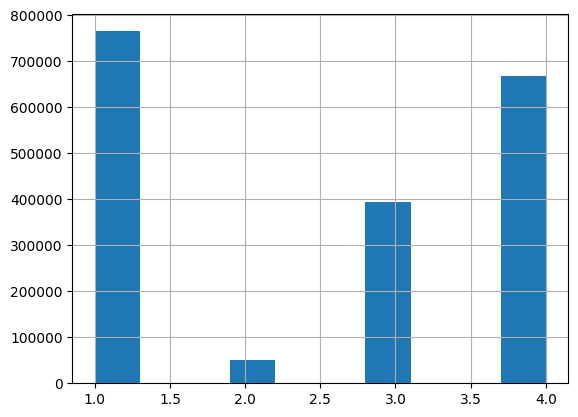

In [15]:
#here we show the number of each severity in the user dataset
users_df.grav.hist()

<AxesSubplot: >

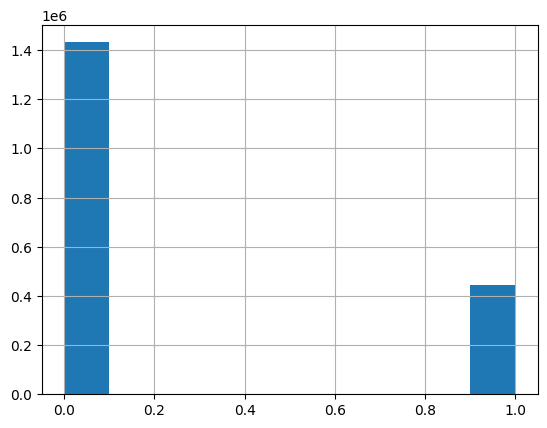

In [16]:
#we only want to focus on the severe accidents 
#2 and 3 are killed or hospitalized and therefore we assign them the value of 1
#1 and 4 are unscathed or lightly wounded and we assign these as 0
users_df = users_df.replace(1,0)
users_df = users_df.replace(3,1)
users_df = users_df.replace(4,0)
users_df = users_df.replace(2,1)

users_df.grav.hist()

<AxesSubplot: >

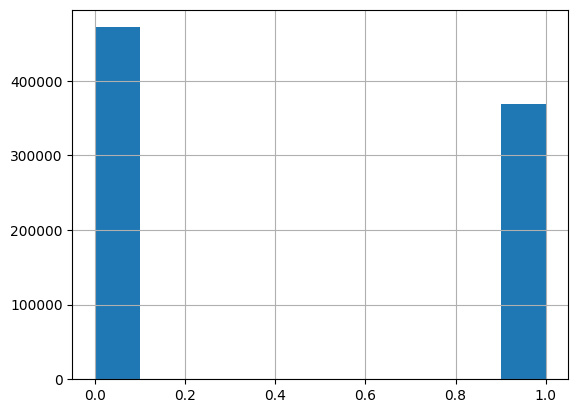

In [17]:
users_df = users_df.groupby(['Num_Acc'], as_index=False).max()

users_df.grav.hist()

In [18]:
places_df.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In [19]:
#we will drop everything except the category of the road (catr), traffic regime (circ), total number of traffic lanes (nbv), surface condition of the road (surf), and infrastructure where the accident occured (infra)
places_df = places_df.drop(["v1", "voie", "v2", "pr", "pr1", "vosp", "prof", "plan", "lartpc", "larrout", "situ", "env1"], axis=1)

places_df.describe()

,Num_Acc,catr,circ,nbv,surf,infra
count,8.399850e+05,839984.000000,839187.000000,838195.000000,838968.000000,838707.000000
mean,2.010011e+11,3.418247,1.855246,2.039593,1.257012,0.438958
std,3.458009e+08,1.207917,0.720949,1.550779,0.954748,1.350905
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000,0.000000
max,2.016001e+11,9.000000,4.000000,99.000000,9.000000,7.000000


In [20]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   circ     839187 non-null  float64
 3   nbv      838195 non-null  float64
 4   surf     838968 non-null  float64
 5   infra    838707 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 38.5 MB


In [21]:
#replace null values of category with the number 9
places_df["catr"] = places_df["catr"].fillna(9)

In [22]:
#change catr type to into
places_df["catr"] = places_df["catr"].astype(int)

In [23]:
places_df["circ"].isna().sum()

798

In [24]:
(places_df["circ"] == 0).sum()

44556

<AxesSubplot: >

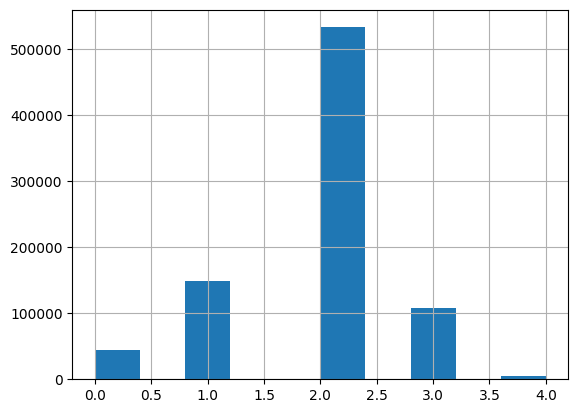

In [25]:
places_df["circ"].hist()

In [26]:
#filling nulls of circ to 2 and replacing 0 with 2
places_df["circ"] = places_df["circ"].fillna(2)
places_df["circ"] = places_df["circ"].replace(0,2)

In [27]:
places_df["circ"] = places_df["circ"].astype(int)

In [28]:
places_df["nbv"].isna().sum()

1790

In [29]:
places_df["nbv"] = places_df["nbv"].where(places_df["nbv"] < 6,0)

In [30]:
(places_df["nbv"] == 0).sum()

122899

<AxesSubplot: >

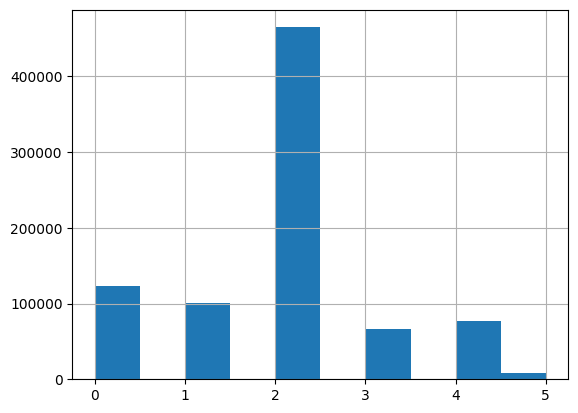

In [31]:
places_df["nbv"].hist()

In [32]:
places_df["nbv"] = places_df["nbv"].fillna(2)
places_df["nbv"] = places_df["nbv"].replace(0,2)

In [33]:
places_df["nbv"] = places_df["nbv"].astype(int)

In [34]:
places_df["surf"].isna().sum()

1017

In [35]:
(places_df["surf"] == 0).sum()

26998

<AxesSubplot: >

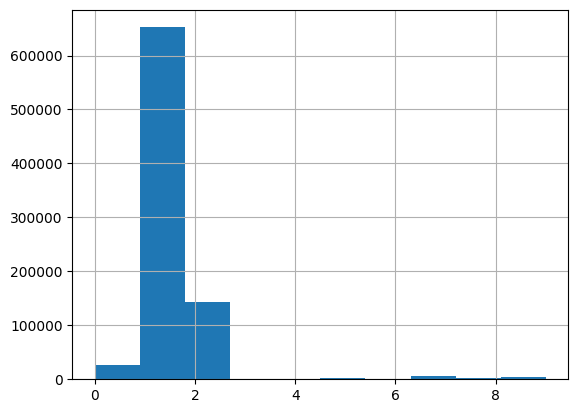

In [36]:
places_df["surf"].hist()

In [37]:
(places_df["surf"] == 1).sum()

652322

In [38]:
places_df["surf"] = places_df["surf"].fillna(1)
places_df["surf"] = places_df["surf"].replace(0,1)

In [39]:
places_df["surf"] = places_df["surf"].astype(int)

In [40]:
(places_df["infra"] == 0).sum()

747965

In [41]:
places_df = places_df.drop(["infra"], axis=1)

In [42]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  839985 non-null  int64
 1   catr     839985 non-null  int32
 2   circ     839985 non-null  int32
 3   nbv      839985 non-null  int32
 4   surf     839985 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 19.2 MB


In [43]:
places_df.describe()

,Num_Acc,catr,circ,nbv,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,3.418254,1.961471,2.169398,1.288842
std,3.458009e+08,1.207931,0.571444,0.788149,0.927817
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,9.000000,4.000000,5.000000,9.000000


In [44]:
caracteristics_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [45]:
caracteristics_df = caracteristics_df.drop(["an", "col", "com", "adr", "gps", "lat", "long"], axis=1)

caracteristics_df.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,564.257671
std,3.458009e+08,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,291.153083
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000
25%,2.007000e+11,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,310.000000
50%,2.010000e+11,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,630.000000
75%,2.013000e+11,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,780.000000
max,2.016001e+11,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,976.000000


In [46]:
caracteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   mois     839985 non-null  int64  
 2   jour     839985 non-null  int64  
 3   hrmn     839985 non-null  int64  
 4   lum      839985 non-null  int64  
 5   agg      839985 non-null  int64  
 6   int      839985 non-null  int64  
 7   atm      839930 non-null  float64
 8   dep      839985 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 57.7 MB


In [47]:
caracteristics_df["atm"].isna().sum()

55

In [48]:
caracteristics_df["atm"] = caracteristics_df["atm"].fillna(1)

In [49]:
caracteristics_df["atm"] = caracteristics_df["atm"].astype(int)

In [50]:
(caracteristics_df["int"] == 0).sum()

106

In [51]:
caracteristics_df["int"] = caracteristics_df["int"].replace(0,1)

In [52]:
caracteristics_df["hrmn"] = caracteristics_df["hrmn"].div(100).apply(np.floor)

In [53]:
caracteristics_df["hrmn"] = caracteristics_df["hrmn"].astype(int)

<AxesSubplot: >

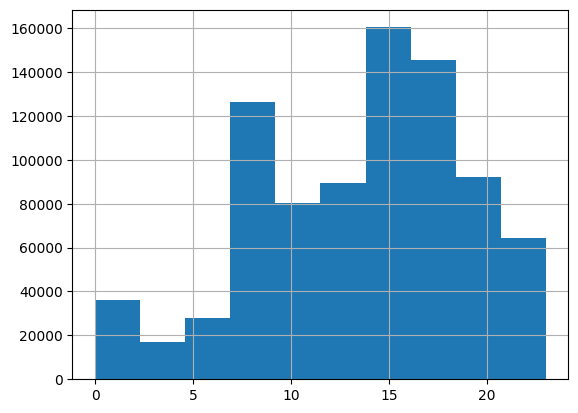

In [54]:
caracteristics_df["hrmn"].hist()

In [55]:
caracteristics_df["dep"] = caracteristics_df["dep"].div(10).apply(np.floor)

In [56]:
caracteristics_df["dep"] = caracteristics_df["dep"].astype(int)

In [57]:
caracteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  839985 non-null  int64
 1   mois     839985 non-null  int64
 2   jour     839985 non-null  int64
 3   hrmn     839985 non-null  int32
 4   lum      839985 non-null  int64
 5   agg      839985 non-null  int64
 6   int      839985 non-null  int64
 7   atm      839985 non-null  int32
 8   dep      839985 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 48.1 MB


In [58]:
caracteristics_df.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155
std,3.458009e+08,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356
min,2.005000e+11,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000
50%,2.010000e+11,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000
75%,2.013000e+11,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000
max,2.016001e+11,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000


In [59]:
datamerge = pd.merge(caracteristics_df, places_df, how="outer", on="Num_Acc")
#merge the dataframes on the num acc (accident ID)

In [60]:
datamerge.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418254,1.961471,2.169398,1.288842
std,3.458009e+08,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207931,0.571444,0.788149,0.927817
min,2.005000e+11,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000


In [61]:
data = pd.merge(datamerge, users_df, how="outer", on="Num_Acc")

In [62]:
data = data.drop("Num_Acc", axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   mois    839985 non-null  int64
 1   jour    839985 non-null  int64
 2   hrmn    839985 non-null  int32
 3   lum     839985 non-null  int64
 4   agg     839985 non-null  int64
 5   int     839985 non-null  int64
 6   atm     839985 non-null  int32
 7   dep     839985 non-null  int32
 8   catr    839985 non-null  int32
 9   circ    839985 non-null  int32
 10  nbv     839985 non-null  int32
 11  surf    839985 non-null  int32
 12  grav    839985 non-null  int64
dtypes: int32(7), int64(6)
memory usage: 67.3 MB


In [64]:
data.describe()

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,grav
count,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418254,1.961471,2.169398,1.288842,0.438448
std,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207931,0.571444,0.788149,0.927817,0.496197
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000,0.000000
50%,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000,1.000000


In [65]:
#create the test and train split where we set the severity as the Y value
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(data.drop("grav", axis=1), data["grav"], test_size=0.2, random_state=42)

In [66]:
X_train, X_Val, y_train, y_Val = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

In [67]:
#create the random tree classifier as the model and fit the training data to the model
model = RandomForestClassifier(n_estimators=100, max_depth= 15, max_features= 6, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=6, n_jobs=-1, random_state=0)

In [68]:
#predict using the testing data and print the accuracy score of the model
y_pred = model.predict(X_Val)
score = accuracy_score(y_Val, y_pred)
score

0.721684846500692

In [69]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]


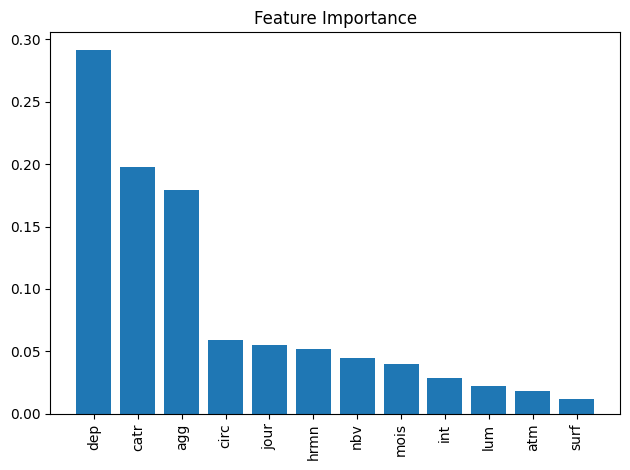

In [70]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()